# 2019 Chapel Hill Expert Survey
## Exploratory analysis

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from urllib.request import urlretrieve
from pathlib import Path
from itertools import cycle
from typing import List, Optional
from sklearn.mixture import GaussianMixture

#### Data loading

In [5]:
# Code for data loading
data_url: str = "https://www.chesdata.eu/s/CHES2019V3.dta"
data_dir = Path("../data")
data_dir.mkdir(exist_ok=True)
data_path = data_dir / "CHES2019V3.dta"
ches_2019_data = pd.read_stata(data_path)

## Country wise party distribution

#### Why?<br>
* **Understand the Dataset's Makeup:** Which countries are included and how many parties were surveyed in each one.<br>
* **Check for Balance:** To see if the dataset is balanced or if there is significant difference in population. some countries have many more parties than others<br>

#### What?<br>
* **Counting Parties per Country:** Number of political parties are listed for each unique country.<br>

***Notes:***
* *Each bar represents a single country.*<br>
* *The length of the bar shows the total number of political parties surveyed for that country.*<br>
* *The bars are sorted from top to bottom, showing the country with the most parties at the top.*<br>


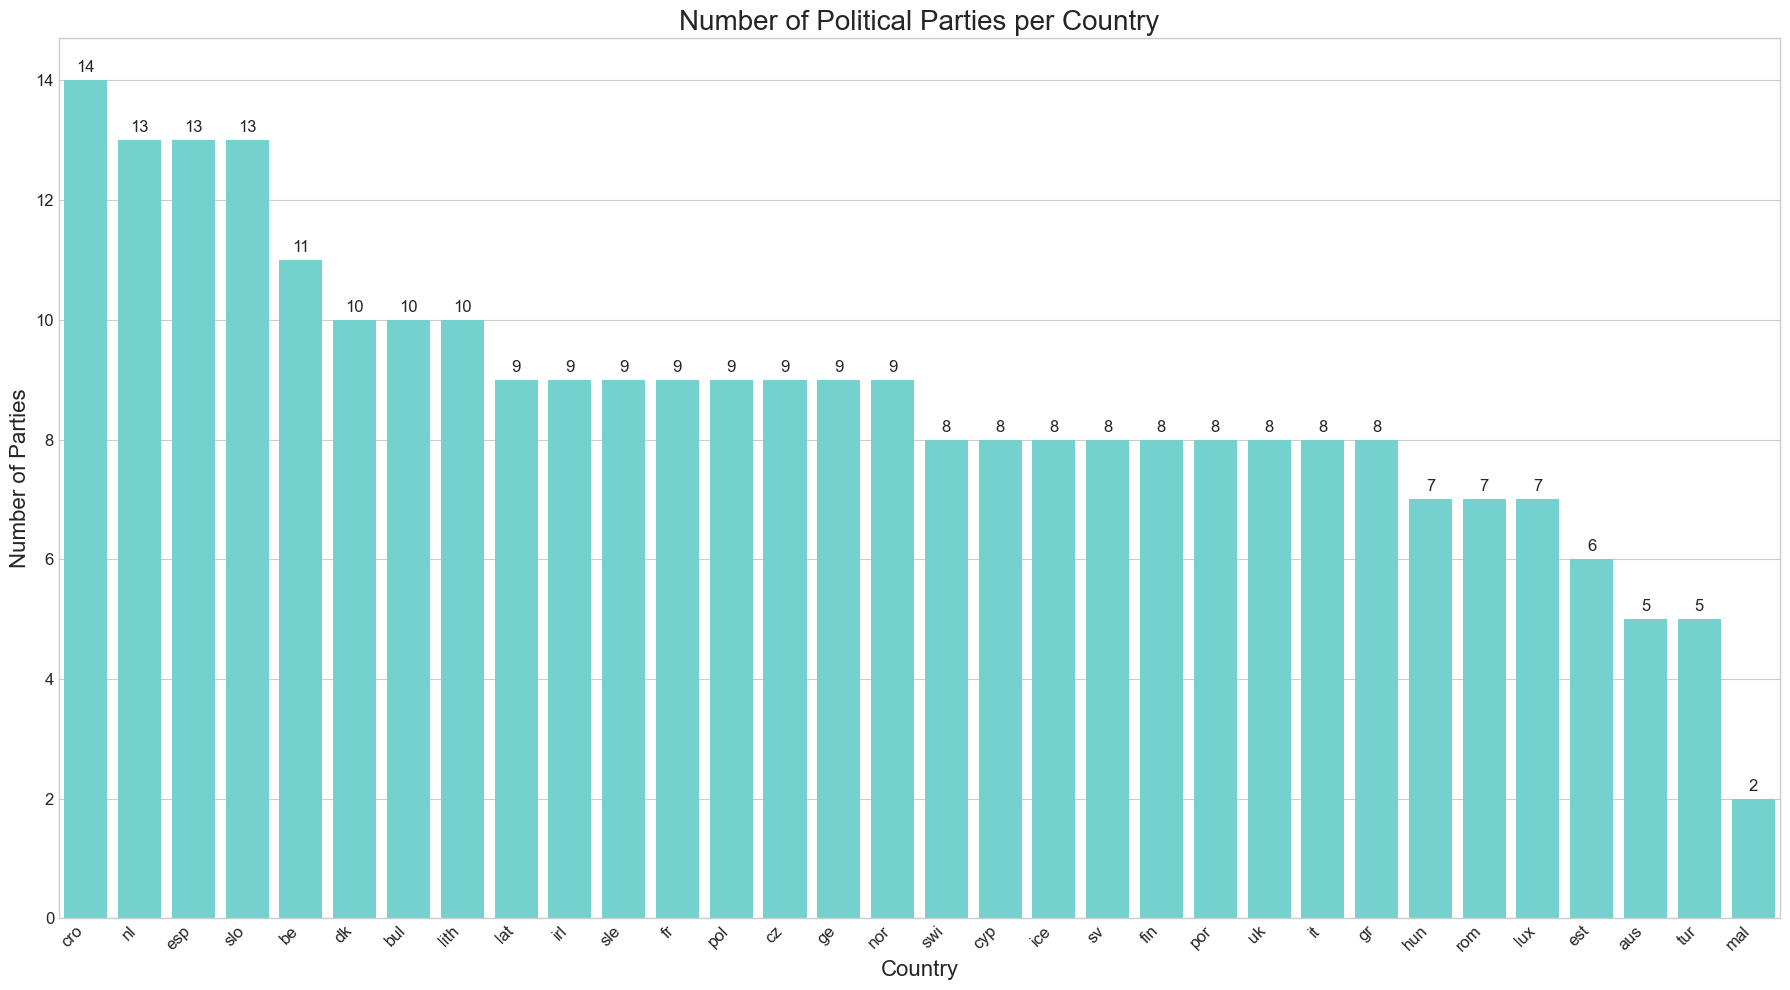

In [6]:
# code for plotting the ideological space
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 10)) # Adjusted figure size for better label spacing
        
# Use x='country' for a vertical plot and a specific green color
order = ches_2019_data['country'].value_counts().index
ax = sns.countplot(x='country', data=ches_2019_data, order=order, color="#65E0DC")
        
# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

plt.title('Number of Political Parties per Country', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Parties', fontsize=16)
        
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
        
plt.tight_layout()
plt.show()

## Ideology distributions

#### Why?<br>
* **To Get a Baseline:** High-level summary of where all the parties stand on the most important issues.<br>
* **To Spot Overall Trends:** General shape of European politics. Are most parties moderate, or are they polarized at the extremes? Are they generally pro-EU or anti-EU?<br>

#### What?<br>
* **Creating Individual Summaries:** Four separate histograms. Each chart focuses on one key ideological dimension.<br>

* **Counting the Parties:** Where the most common or popular political positions are.<br>
   
* **Visualizing the Landscape:** Understand the main tendencies and distributions within the entire set of 277 political parties.<br><br>

***Notes:***
* *For variables on a 0-10 scale (lrgen, galtan, lrecon): A bin size of 20 was selected for higher resolution. This choice creates bins with a width of 0.5, effectively dividing each integer step on the scale into two.*<br>

* *For the eu_position variable on a 1-7 scale: Following the same logic, a bin size of 14 was chosen.*

#### Analysis of findings
**1. Overall Left-Right Ideology (lrgen)**<br>
* The distribution is somewhat centered, with the highest concentration of parties falling between 3 and 7. <br>
* There are distinct left-leaning and right-leaning groups of parties, most tend to be relatively moderate rather than occupying the extreme ends of the ideological spectrum.<br>

**2. Social Values (galtan)**<br>
* Clear peak on the left side of the graph, around a score of 2-3.<br>
* Large number of European political parties have strong socially liberal/libertarian platforms.<br>

**3. Economic Left-Right Ideology (lrecon)**<br>
* There's a major peak on the center-left (around 3-4) and another major peak on the center-right (around 6-7).<br>
* When it comes to the economy, political parties get devided in 2 sides. One side is more(left-leaning), wanting the government to help people. The other side(Right side) wanting fewer rules for businesses and lower taxes.<br>

**4. Position on European Integration (eu_position)**<br>
* What it shows: This plots the parties' stance on whether they favor or oppose European integration.<br>
* Heavily skewed to the right. Clustered at the high end of the scale, especially between 6 and 7 ("In Favor" and "Strongly in Favor").
Majority of political parties included are pro-European integration.<br>

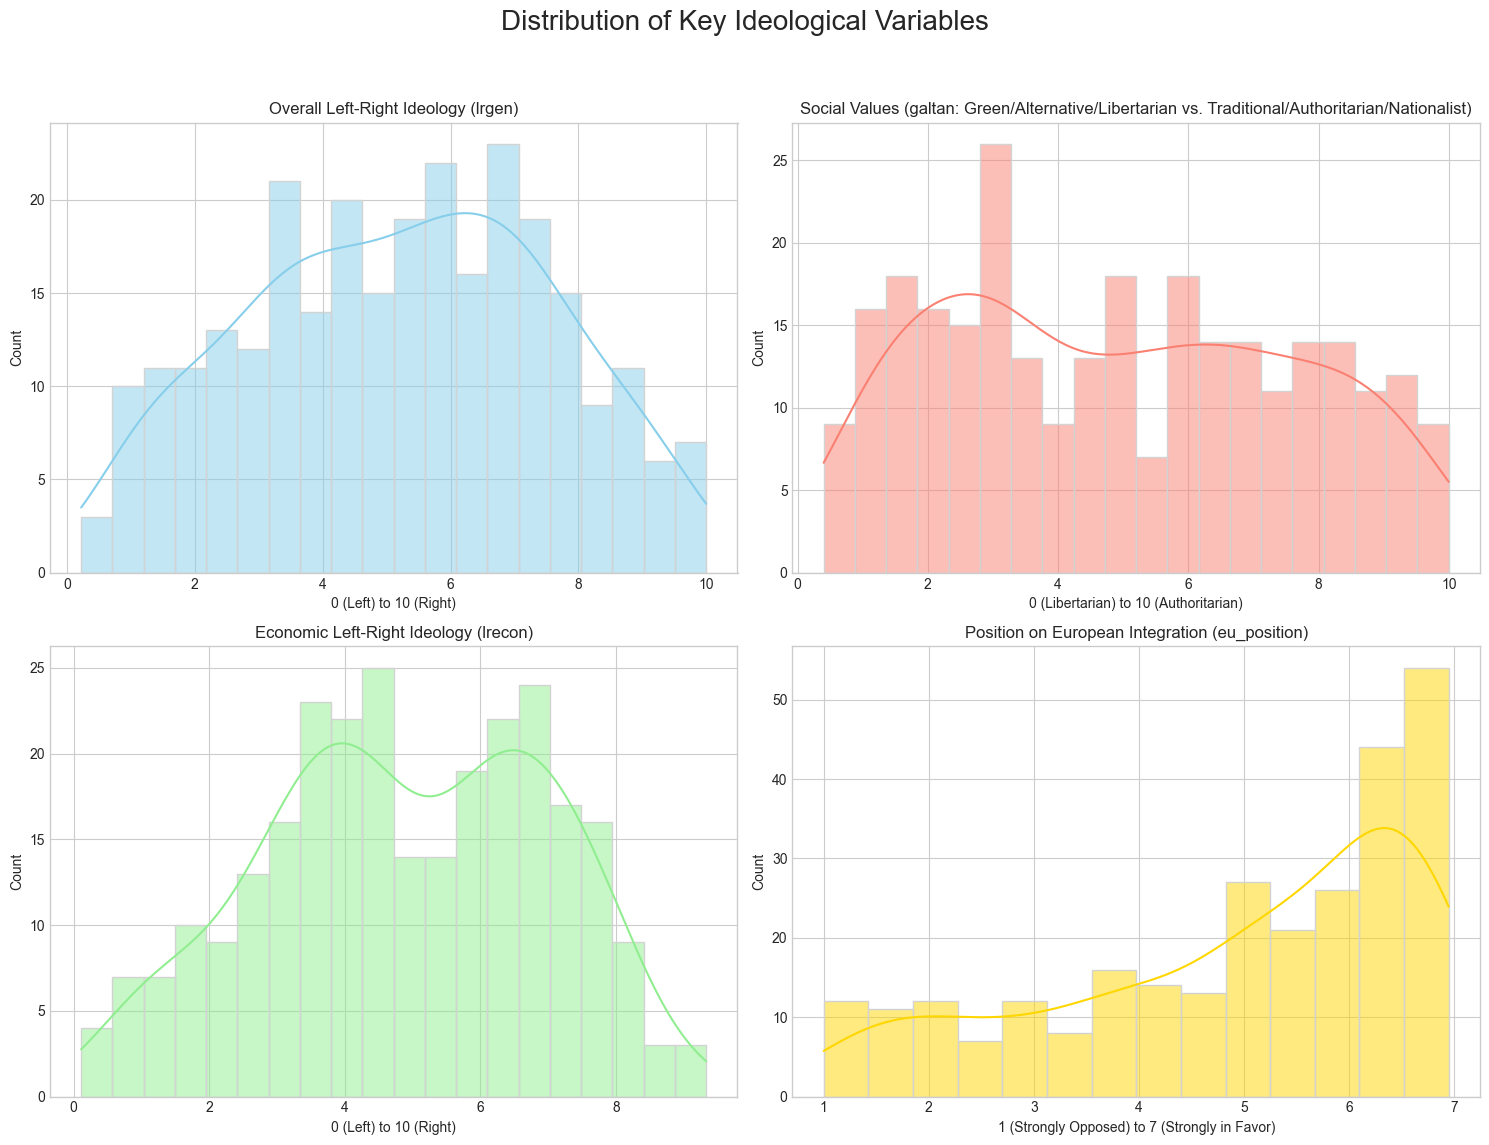

In [7]:
# code for plotting the ideological space
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Ideological Variables', fontsize=20)

sns.histplot(ches_2019_data['lrgen'], kde=True, ax=axes[0, 0], color='skyblue', bins=20, edgecolor='lightgrey')
axes[0, 0].set_title('Overall Left-Right Ideology (lrgen)')
axes[0, 0].set_xlabel('0 (Left) to 10 (Right)')

sns.histplot(ches_2019_data['galtan'], kde=True, ax=axes[0, 1], color='salmon', bins=20, edgecolor='lightgrey')
axes[0, 1].set_title('Social Values (galtan: Green/Alternative/Libertarian vs. Traditional/Authoritarian/Nationalist)')
axes[0, 1].set_xlabel('0 (Libertarian) to 10 (Authoritarian)')

sns.histplot(ches_2019_data['lrecon'], kde=True, ax=axes[1, 0], color='lightgreen', bins=20, edgecolor='lightgrey')
axes[1, 0].set_title('Economic Left-Right Ideology (lrecon)')
axes[1, 0].set_xlabel('0 (Left) to 10 (Right)')
        
sns.histplot(ches_2019_data['eu_position'], kde=True, ax=axes[1, 1], color='gold', bins=14, edgecolor='lightgrey')
axes[1, 1].set_title('Position on European Integration (eu_position)')
axes[1, 1].set_xlabel('1 (Strongly Opposed) to 7 (Strongly in Favor)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Notes:
* Each dot is a political party.<br>
* X-axis position (lrecon): Shows the party's position on economic issues (Left to Right).<br>
* Y-axis position (galtan): Shows the party's position on social issues (Libertarian to Authoritarian).<br>
* Color (eu_position): The color of the dot shows the party's stance on European integration. The color scale goes from red (opposed to the EU) to blue (in favor of the EU).<br>
* Size (eu_salience): The size of the dot shows how important the issue of European integration is to that party. Bigger dots mean the EU is a very important topic for them.<br>

#### Analysis of findings
* *Main Takeaway:* A party's stance on social issues is strongly linked to its position on the EU.<br>
* Majority of pro-EU parties(blue dots) are in the bottom half(more "Libertarian") of the chart. Anti-EU Parties(red dots) are Socially Conservative<br>
* Top-right quadrant is where most of the red dots (anti-EU) are clustered(right-wing economics with socially conservative and nationalist views).<br>

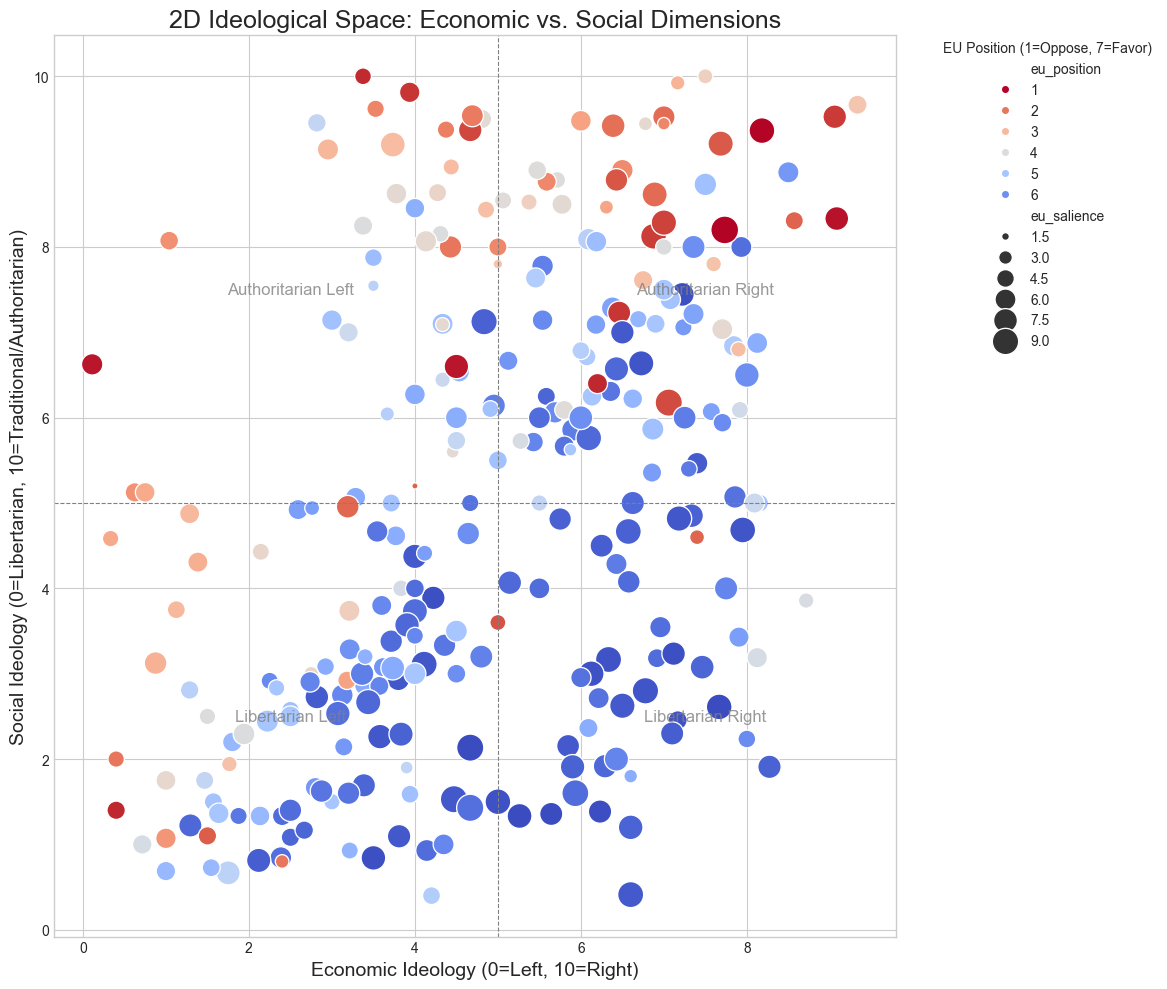

In [8]:
# code for plotting the ideological space
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x='lrecon', 
    y='galtan', 
    hue='eu_position',
    size='eu_salience',
    sizes=(20, 400),
    palette='coolwarm_r',
    data=ches_2019_data
)
plt.title('2D Ideological Space: Economic vs. Social Dimensions', fontsize=18)
plt.xlabel('Economic Ideology (0=Left, 10=Right)', fontsize=14)
plt.ylabel('Social Ideology (0=Libertarian, 10=Traditional/Authoritarian)', fontsize=14)
plt.legend(title='EU Position (1=Oppose, 7=Favor)', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
# Add grid for better interpretation
plt.grid(True)
        
# Add annotations for quadrants
plt.axhline(5, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(5, color='grey', linestyle='--', linewidth=0.8)
plt.text(2.5, 2.5, 'Libertarian Left', ha='center', va='center', fontsize=12, color='grey', alpha=0.8)
plt.text(7.5, 2.5, 'Libertarian Right', ha='center', va='center', fontsize=12, color='grey', alpha=0.8)
plt.text(2.5, 7.5, 'Authoritarian Left', ha='center', va='center', fontsize=12, color='grey', alpha=0.8)
plt.text(7.5, 7.5, 'Authoritarian Right', ha='center', va='center', fontsize=12, color='grey', alpha=0.8)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Co-relation analysis

#### Why?<br>
* **To Find Hidden Structures:** Which policy positions consistently bundle together to form a coherent political stance.

#### What?<br>
* **Calculating Relationships:** Calculating the correlation score for every pair of variables.

* **Visualizing with Color:** Creating a color-coded grid (a heatmap) of these scores. 
    * <span style="color:green">Green</span> - Variables are strongly co-related
    * <span style="color:red">Red</span> - One variable goes up as the other goes down
    * <span style="color:yellow">Yellow</span> - Variables are unrelated.

* **Identifying Key Patterns:** Identify the most significant green and red blocks, which represent the most important relationships.

#### Analysis results
*NOTE: Following provides descriptions for selected variables*<br><br>
**1. galtan and immigrate_policy - <span style="color:green">Highly corelated</span>**<br>
* Parties that hold more traditional and authoritarian social values are also very likely to favor a more restrictive immigration policy.<br>

**2. people_vs_elite and antielite_salience - <span style="color:green">Highly corelated</span>**<br>
* If a party says that ordinary people should have the final say on big issues (instead of politicians), it's also very likely that their speeches and ads will be full of messages attacking the "elite" or the "establishment."<br>

**3. eu_position and immigrate_policy - <span style="color:red">Highly un-corelated</span>**<br>
* As a party's support for the EU increases, its support for restrictive immigration policies decreases.<br>

**4. lrecon and deregulation - <span style="color:green">Highly corelated</span>**<br>
* Parties on the economic right are strong supporters of deregulating markets.<br>

**5. galtan and sociallifestyle - <span style="color:red">Highly un-corelated</span>**<br>
* If a party wants to be a Traditional/Authoritarian, it's almost certain that they will also be against "liberal social policies" like rights for homosexuals.<br>

**6. eu_position and nationalism - <span style="color:red">Highly un-corelated</span>**<br>
* As a party's support for the EU increases, its promotion of nationalism decreases.<br>

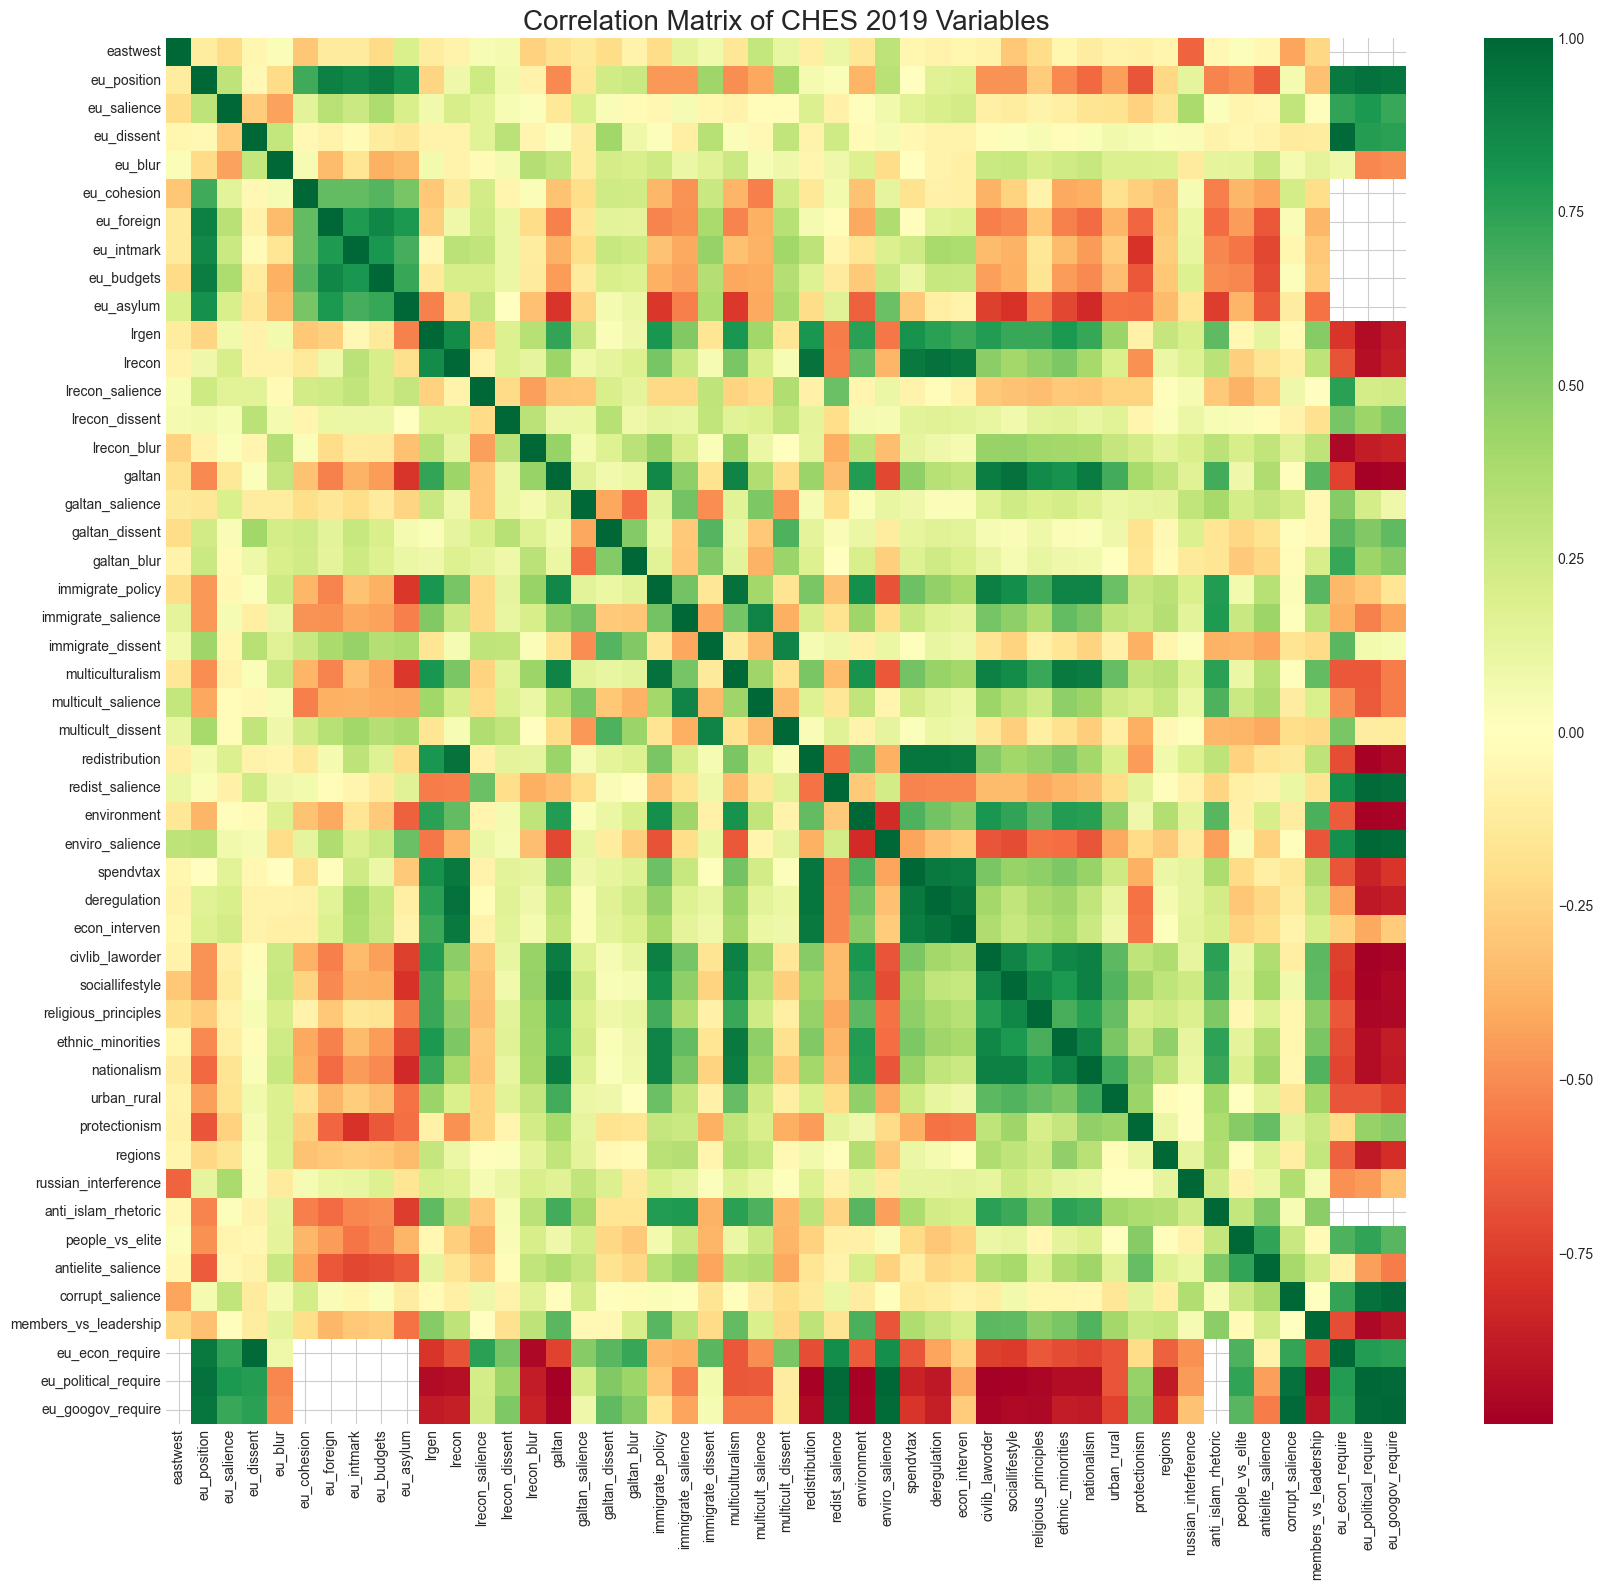

In [9]:
# code for plotting correlation matrix
# Select only numeric columns for correlation
numeric_cols = ches_2019_data.select_dtypes(include=np.number)
        
# We can drop columns that are just identifiers or standard deviations
cols_to_drop = [col for col in numeric_cols.columns if '_sd' in col or '_id' in col]
        
corr_matrix = numeric_cols.drop(columns=cols_to_drop).corr()
        
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', fmt=".1f")
plt.title('Correlation Matrix of CHES 2019 Variables', fontsize=20)
plt.show()

## Extreme parties

#### Why?<br>
* **Understand the Boundaries:** Most extreme parties helps to define the ideological boundaries of the dataset. It answers the question, "What do the most left-wing, right-wing, pro-EU, etc.

#### What?<br>
* **Defining Key Dimensions:** Selecting six key ideological poles to examine: the two ends of the economic axis (lrecon), the social axis (galtan), and the European integration axis (eu_position).

* **Extracting the Top 5:** Takes the top 5 parties from each sorted list. For example, for "Most Left-Wing," it takes the 5 parties with the lowest lrecon scores. 

#### Analysis results
*NOTE: Following provides descriptions for selected variables*<br><br>
**1. Economic Extremes**<br>
* Most Right-Wing parties are a mix of populist-right (Vox in Spain) and libertarian parties (LA in Denmark) that push for minimal government and free markets.<br>

**2. Social Extremes**<br>
* Most Libertarian parties are often green, pirate, or radical parties (like Píratar in Iceland and RI in Italy) that champion individual freedoms and progressive social policies<br>

**3. EU Stance Extremes**<br>
* Most Pro-EU parties are typically centrist, liberal, or social-liberal parties (Nowo in Poland, D66 in the Netherlands) for whom European integration is a core value.<br>

In [11]:
#code for showing extremes
categories = {
    'Most Left-Wing (Economic)': ('lrecon', True),
    'Most Right-Wing (Economic)': ('lrecon', False),
    'Most Libertarian (Social)': ('galtan', True),
    'Most Authoritarian (Social)': ('galtan', False),
    'Most Anti-EU': ('eu_position', True),
    'Most Pro-EU': ('eu_position', False)
}

# Prepare all tables
tables = []
for title, (column, ascending) in categories.items():
    df_slice = ches_2019_data.sort_values(column, ascending=ascending).head(5).copy()
    display_df = df_slice[['party', 'country', column]].rename(columns={
        'party': 'Party',
        'country': 'Country',
        column: 'Score'
    })
    tables.append({'title': f"--- {title} ---", 'df': display_df})
        
# Print tables in a 3x2 grid
for i in range(0, len(tables), 2):
    table1_data = tables[i]
    table2_data = tables[i+1]

    table1_str = table1_data['df'].to_markdown(index=False)
    table2_str = table2_data['df'].to_markdown(index=False)

    table1_lines = table1_str.split('\n')
    table2_lines = table2_str.split('\n')

    # Determine the width for the first column of tables for alignment
    col1_width = max(len(line) for line in table1_lines) + 5 # Add padding

    # Print titles side-by-side
    print(f"{table1_data['title'].ljust(col1_width)}{table2_data['title']}")

    # Print table content line-by-line
    num_lines = max(len(table1_lines), len(table2_lines))
    for j in range(num_lines):
        line1 = table1_lines[j] if j < len(table1_lines) else ""
        line2 = table2_lines[j] if j < len(table2_lines) else ""
        print(f"{line1.ljust(col1_width)}{line2}")
            
    print("\n") # Add a newline for spacing between rows

--- Most Left-Wing (Economic) ---       --- Most Right-Wing (Economic) ---
| Party    | Country   |    Score |     | Party        | Country   |   Score |
|:---------|:----------|---------:|     |:-------------|:----------|--------:|
| KKE      | gr        | 0.111111 |     | Vox          | esp       | 9.33333 |
| PVDA-PTB | be        | 0.333333 |     | FvD          | nl        | 9.08333 |
| S-PBP    | irl       | 0.4      |     | Konfederacia | pol       | 9.05882 |
| RV       | nor       | 0.4      |     | LA           | dk        | 8.71429 |
| CDU      | por       | 0.625    |     | NB           | dk        | 8.57143 |


--- Most Libertarian (Social) ---      --- Most Authoritarian (Social) ---
| Party   | Country   |    Score |     | Party   | Country   |    Score |
|:--------|:----------|---------:|     |:--------|:----------|---------:|
| Pi      | ice       | 0.4      |     | ELAM    | cyp       | 10       |
| RI      | it        | 0.411765 |     | XA      | gr        | 10       |

## Outlier Detection

#### Why?<br>
* **Understand the Spread of Opinions:** Show the median (the "typical" party's position), the range of mainstream views (the box), and the full spectrum of opinions (the whiskers).

* **Identify Outliers:** Show the outliers.

#### What?<br>
* **Creating a Grid of Boxplots:** Generating a separate boxplot for each of these variables.

* **Visualizing the Distribution:** Each boxplot shows the median, the middle 50% of the data (the box), and the typical range (the whiskers). 

#### Analysis results
*NOTE: Following provides descriptions for selected variables*<br><br>
**1. Overall Left-Right Ideology <span style="color:green">(lrgen)</span>**<br>
* Most parties fall within the mainstream range, and there is no strong consensus leaning one way or the other.<br>

**2. Social Ideology <span style="color:green">(galtan)</span>**<br>
* strong consensus towards libertarian/progressive social values. The typical European party is socially liberal.<br>

**3. Economic Ideology <span style="color:green">(lrecon)</span>**<br>
* No single dominant economic ideology; instead, there is a healthy and wide-ranging division of opinion.<br>

**4. Position on European Integration <span style="color:green">(eu_position)</span>**<br>
* Being strongly in favor of European integration is the mainstream position.<br>

**5. Immigration Policy <span style="color:green">(immigrate_policy)</span>**<br>
* Most parties occupy a middle ground.<br>

**6. Populism <span style="color:green">(people_vs_elite)</span>**<br>
* Highly populist parties are the outliers.<br>

**7. Environment vs. Economy <span style="color:green">(environment)</span>**<br>
* General lean towards prioritizing environmental protection.<br>

**8. Wealth Redistribution <span style="color:green">(redistribution)</span>**<br>
* Deeply divided on whether to favor or oppose the redistribution of wealth, and both positions are well within the mainstream.<br>

**9. Cosmopolitanism vs. Nationalism <span style="color:green">(nationalism)</span>**<br>
* Strongly nationalist parties are outliers in the overall landscape.<br>

**10. Civil Liberties vs. Law & Order <span style="color:green">(civlib_laworder)</span>**<br>
* Healthy debate with a slight preference for protecting civil liberties over implementing tough law and order measures.<br>

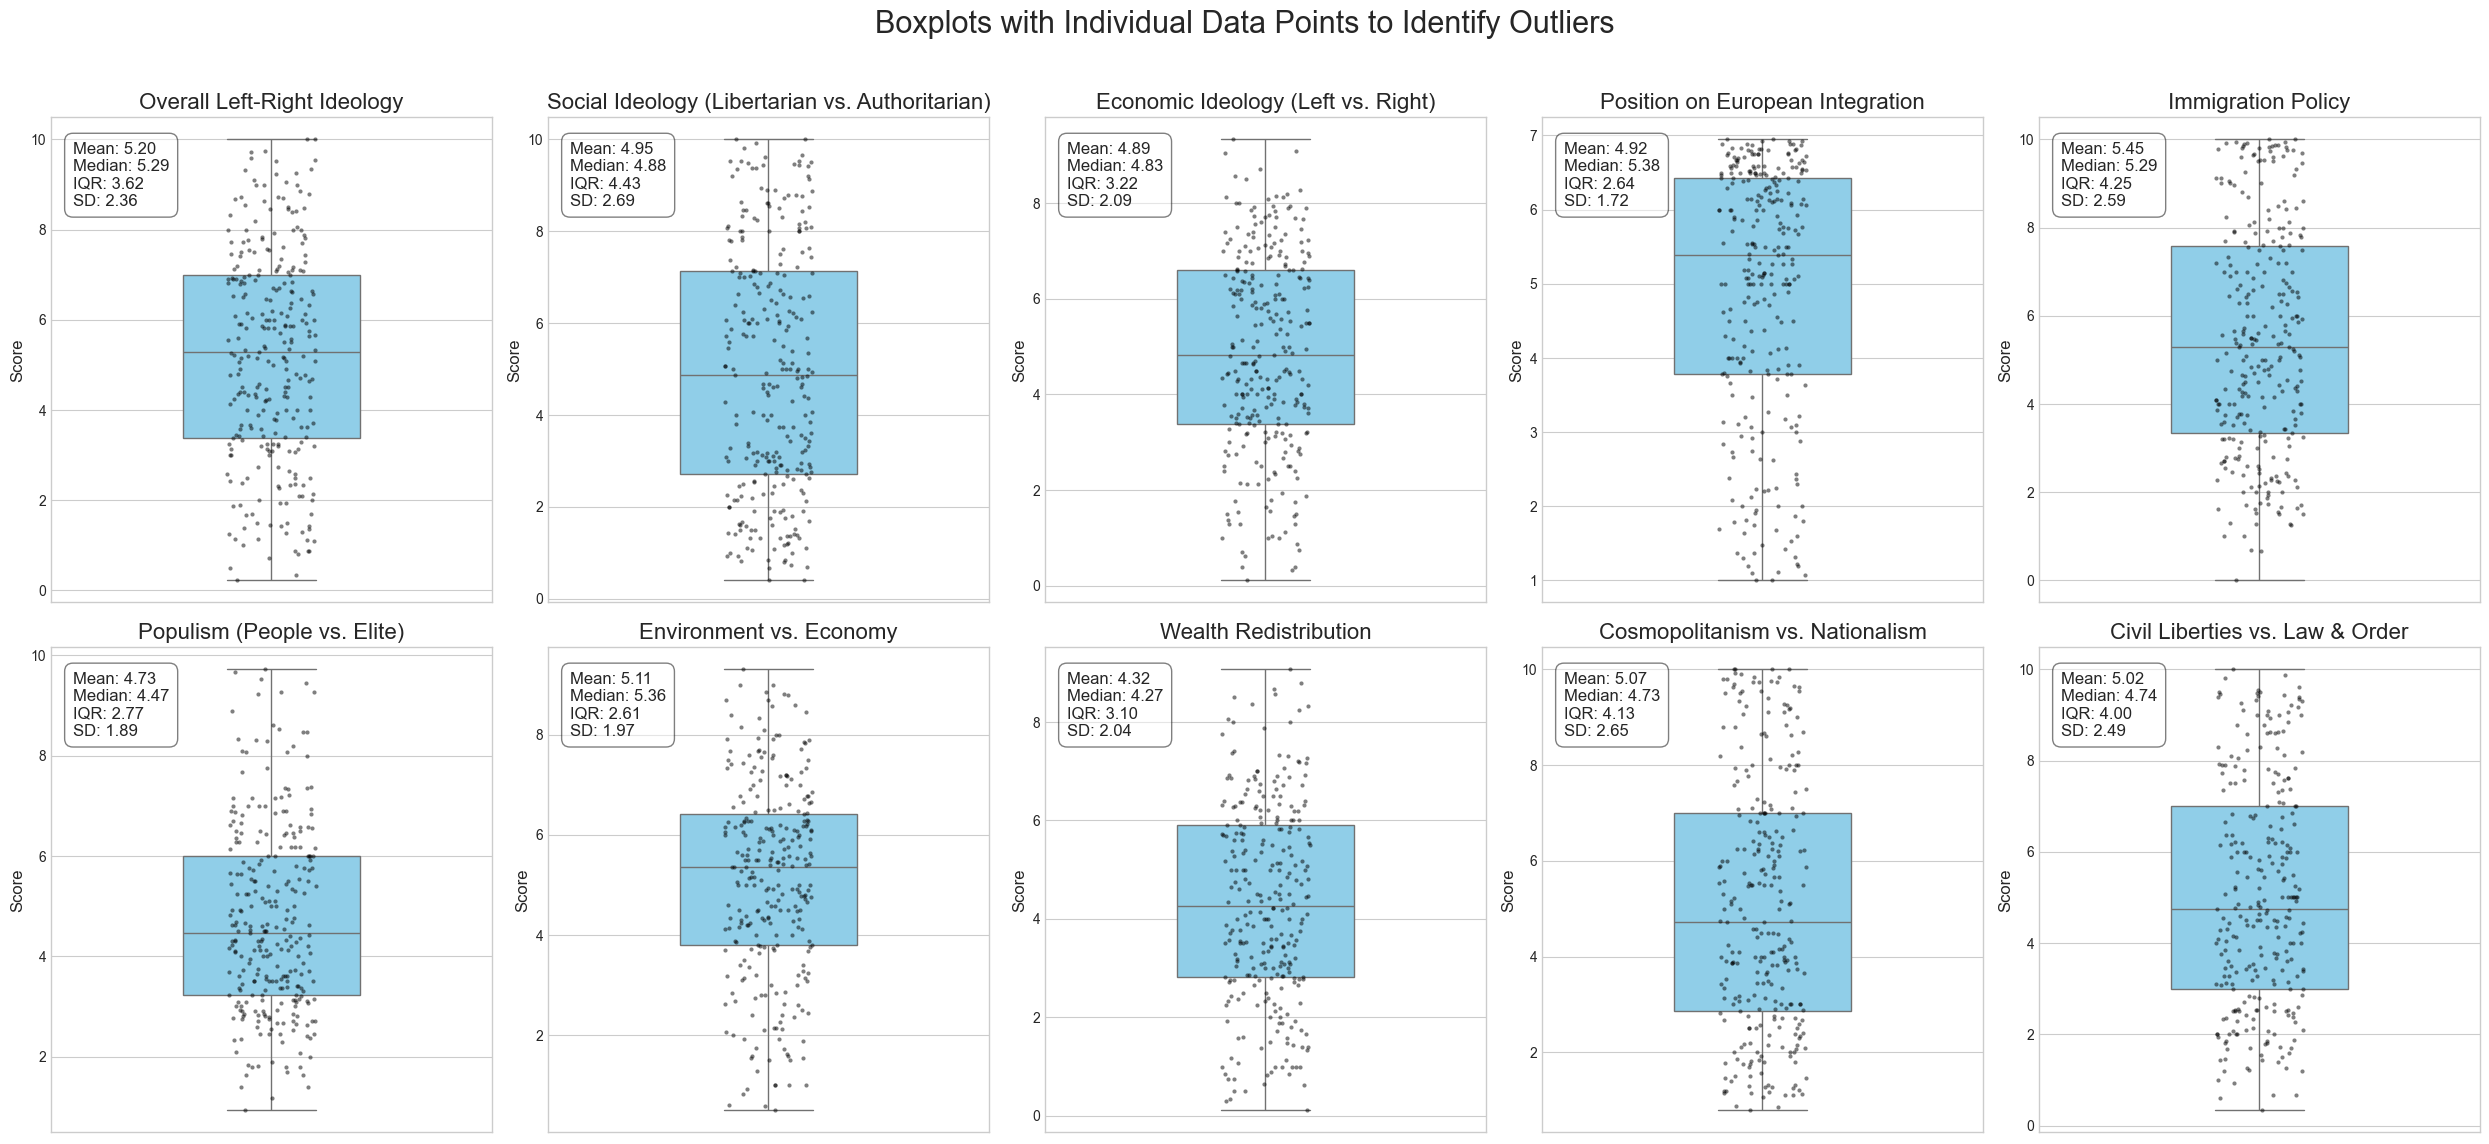

In [12]:
#code for the plotting of outliers
# 1. Select the variables of interest for outlier detection
variables_to_plot = [
    'lrgen', 
    'galtan', 
    'lrecon', 
    'eu_position', 
    'immigrate_policy', 
    'people_vs_elite',
    'environment',
    'redistribution',
    'nationalism',
    'civlib_laworder'
]

# 2. Create a descriptive title for each plot
titles = [
    'Overall Left-Right Ideology',
    'Social Ideology (Libertarian vs. Authoritarian)',
    'Economic Ideology (Left vs. Right)',
    'Position on European Integration',
    'Immigration Policy',
    'Populism (People vs. Elite)',
    'Environment vs. Economy',
    'Wealth Redistribution',
    'Cosmopolitanism vs. Nationalism',
    'Civil Liberties vs. Law & Order'
]

# 3. Create a 2x5 grid of subplots for a compact layout
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
fig.suptitle('Boxplots with Individual Data Points to Identify Outliers', fontsize=22)
axes = axes.flatten() # Flatten the array for easy iteration

# 4. Loop through the selected variables and create a boxplot for each one
for i, var in enumerate(variables_to_plot):
    ax = axes[i]
    data = ches_2019_data[var].dropna()
    
    # Use seaborn to create the boxplot on the current axis (ax) with a specific grey color
    sns.boxplot(y=data, ax=ax, color="#81d4f7", width=0.4)
    
    # Overlay a stripplot to show all individual data points as dots
    sns.stripplot(y=data, ax=ax, color='black', size=3, jitter=True, alpha=0.5)
    
    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    std_val = data.std() # Calculate Standard Deviation
    
    # Create the text string, now including the Standard Deviation (SD)
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nIQR: {iqr:.2f}\nSD: {std_val:.2f}'
    
    # Add the text to the plot in the top-left corner
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
    
    # Set the title for the subplot
    ax.set_title(titles[i], fontsize=16)
    
    # Set a clear label for the y-axis
    ax.set_ylabel('Score', fontsize=12)

# 5. Adjust the layout to prevent titles from overlapping and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


## Country wise analysis

#### Why?<br>
* **Understand the Spread of Opinions:** Show the median (the "typical" country's position), the range of mainstream views (the box), and the full spectrum of opinions (the whiskers).

#### What?<br>
* **Creating a Grid of Boxplots:** Generating a separate boxplot for each of these countries.

* **Visualizing the Distribution:** Each boxplot shows the median, the middle 50% of the data (the box), and the typical range (the whiskers). 

#### Analysis results
*NOTE: Following provides descriptions for selected countries*<br><br>
**1. Estonia (EST)**<br>
* Generally pro-European integration stance.<br>

**2. Hungary (HUN)**<br>
* Moderate spread of opinions.<br>

**3. Slovenia (SLO)**<br>
* Broader distribution of views, suggesting less internal consensus.<br>

**4. Iceland (ICE)</span>**<br>
* Considerable spread of opinions, highlighting diverse views within the country on this matter..<br>

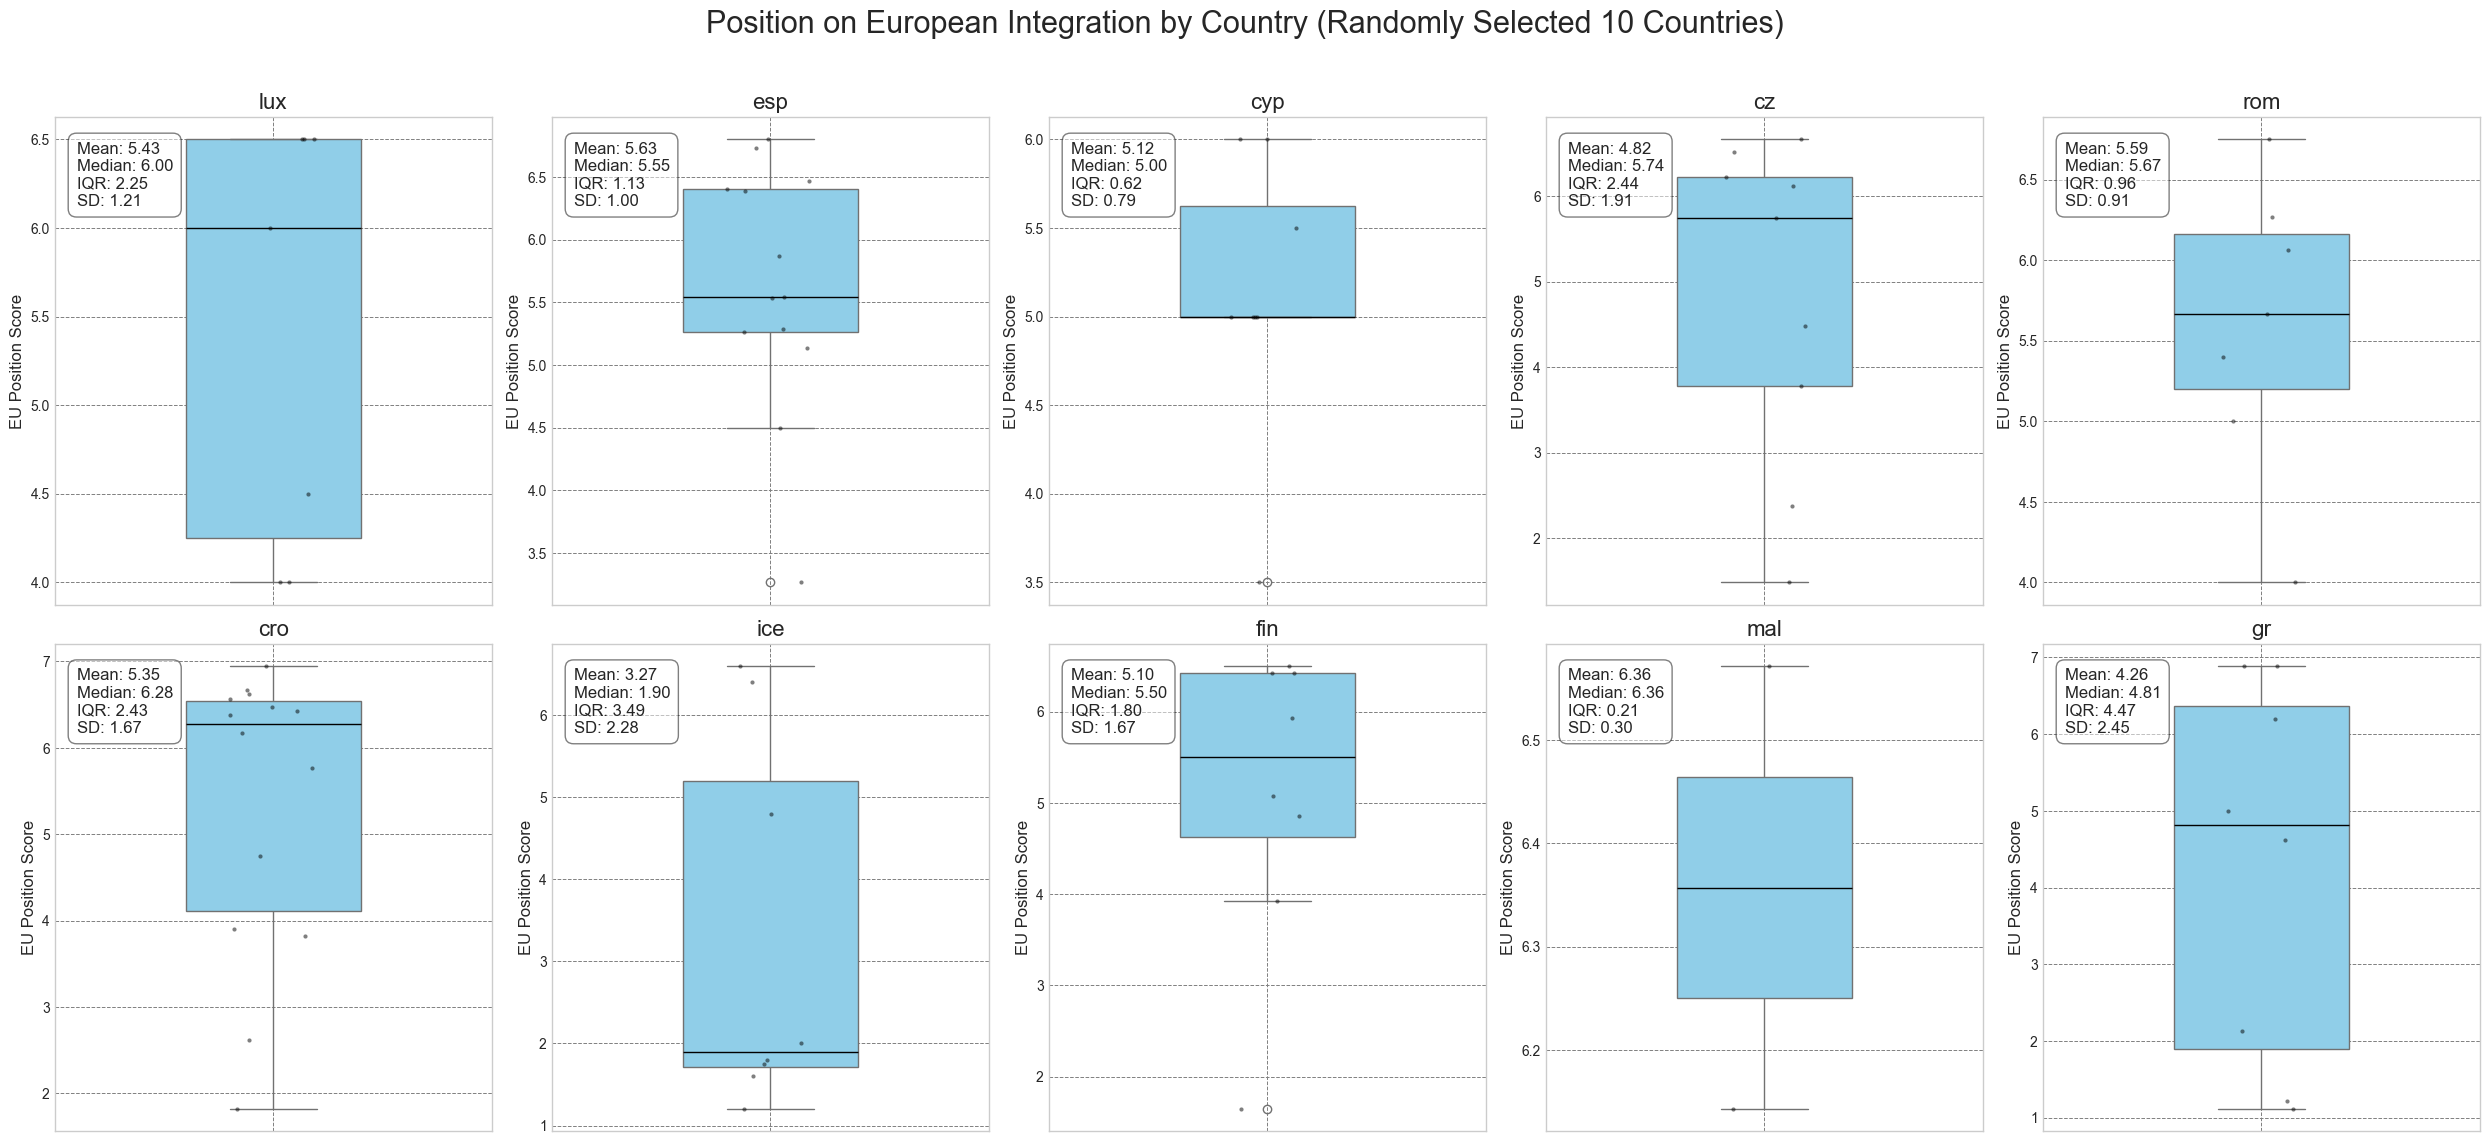

In [13]:
#code for the plotting the position on European integration by country
df = pd.DataFrame(ches_2019_data)

country_col = 'country'
eu_integration_var = 'eu_position'

# Drop rows with NaN values in the relevant columns
df_cleaned = df.dropna(subset=[country_col, eu_integration_var])

# Get unique countries and randomly select 10
unique_countries = df_cleaned[country_col].unique()

# Handle cases where there are fewer than 10 unique countries
if len(unique_countries) < 10:
    countries_to_plot = unique_countries.tolist()
else:
    # Randomly select 10 countries
    rng = np.random.default_rng() # Use a default_rng for modern random number generation
    countries_to_plot = rng.choice(unique_countries, size=10, replace=False).tolist()

# Create a grid of subplots (1 subplot per country)
num_plots = len(countries_to_plot)
rows = (num_plots + 4) // 5 if num_plots > 0 else 1 # Calculate rows needed (ceil division)
fig, axes = plt.subplots(rows, 5, figsize=(25, 6 * rows))
fig.suptitle(f'Position on European Integration by Country (Randomly Selected {num_plots} Countries)', fontsize=22)

# Flatten the axes array for easy iteration, handling single row case
if rows == 1 and num_plots <= 5:
    axes = axes.flatten()
elif rows > 1:
    axes = axes.flatten()
else: # Case where num_plots is 0 or 1 and axes is not an array
    axes = [axes] 

# Loop through the selected countries and create a boxplot for 'eu_position' for each
for i, country in enumerate(countries_to_plot):
    ax = axes[i]
    # Filter data for the current country and drop NaNs for eu_position
    data_for_country = df_cleaned[df_cleaned[country_col] == country][eu_integration_var].dropna()

    if data_for_country.empty:
        ax.set_title(f"{country} (No Data)", fontsize=16)
        ax.set_ylabel('EU Position Score', fontsize=12)
        ax.text(0.5, 0.5, "No data available", transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center', fontsize=14, color='red')
        # Hide the axis ticks and labels if no data
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    sns.boxplot(y=data_for_country, ax=ax, color="#81d4f7", width=0.4, medianprops={'color': 'black'})

    # Overlay a stripplot to show all individual data points as dots
    sns.stripplot(y=data_for_country, ax=ax, color='black', size=3, jitter=True, alpha=0.5)

    # Calculate statistics
    mean_val = data_for_country.mean()
    median_val = data_for_country.median()
    q1 = data_for_country.quantile(0.25)
    q3 = data_for_country.quantile(0.75)
    iqr = q3 - q1
    std_val = data_for_country.std() 

    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nIQR: {iqr:.2f}\nSD: {std_val:.2f}'

    # Add the text to the plot in the top-left corner
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

    # Set the title for the subplot to the country name
    ax.set_title(country, fontsize=16)

    # Set a clear label for the y-axis
    ax.set_ylabel('EU Position Score', fontsize=12)

    # Apply grey grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey')

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


## Analysis of Most Divisive Issues

#### Why?<br>
* **Understand the Spread of Opinions:** Show the median (the "typical" country's position), the range of mainstream views (the box), and the full spectrum of opinions (the whiskers).

#### What?<br>
* This analysis uses the _dissent variables to find out which issues cause the most internal disagreement within political parties across Europe.

* It highlights the "fault lines" of modern politics. Issues with high average dissent are likely those that are currently in flux or cut across traditional left-right divides, forcing parties to navigate internal disagreements.

#### Analysis results

* Economic Ideology (LRECON) is the Most Divisive Issue (Average Dissent: 2.90).<br>

* Social Ideology (GALTAN) is the Second Most Divisive (Average Dissent: 2.75).<br>

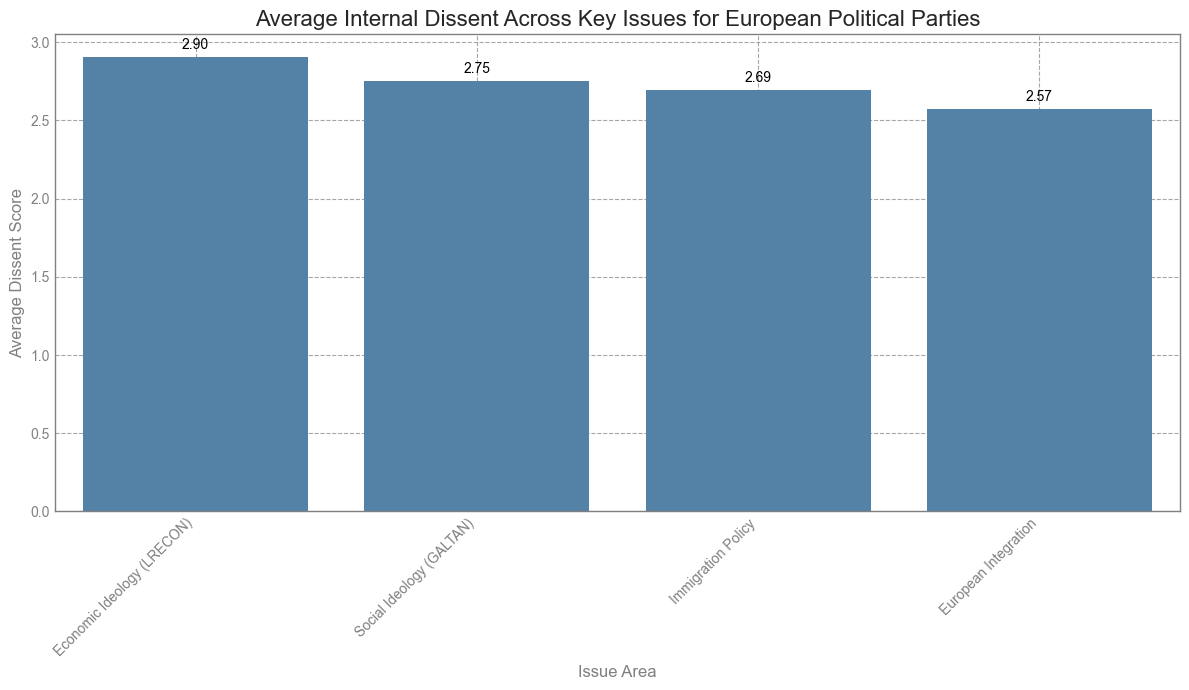

In [14]:
# plot of average internal dissent across key issues for European political parties
# 1. Select the main _dissent variables
dissent_variables = [
    'galtan_dissent',
    'lrecon_dissent',
    'immigrate_dissent',
    'eu_dissent'
]

dissent_labels = {
    'galtan_dissent': 'Social Ideology (GALTAN)',
    'lrecon_dissent': 'Economic Ideology (LRECON)',
    'immigrate_dissent': 'Immigration Policy',
    'eu_dissent': 'European Integration'
}

# Filter out variables that might not exist in the actual DataFrame
existing_dissent_variables = [var for var in dissent_variables if var in ches_2019_data.columns]

if not existing_dissent_variables:
    print("No dissent variables found in the DataFrame. Please check column names.")
else:
    # 2. Calculate the mean dissent score for each variable
    average_dissent_scores = {
        dissent_labels[var]: ches_2019_data[var].mean()
        for var in existing_dissent_variables
    }

    # Convert to a Pandas Series for easy plotting
    dissent_series = pd.Series(average_dissent_scores).sort_values(ascending=False)

    # 3. Create a bar chart to compare these average dissent scores
    plt.figure(figsize=(12, 7))
    # Make all bars the same color (e.g., 'steelblue')
    sns.barplot(x=dissent_series.index, y=dissent_series.values, color='steelblue')

    # 4. Add clear title and labels
    plt.title('Average Internal Dissent Across Key Issues for European Political Parties', fontsize=16)
    plt.xlabel('Issue Area', fontsize=12)
    plt.ylabel('Average Dissent Score', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability

    # Make all grids in grey color
    plt.grid(True, linestyle='--', alpha=0.7, color='grey') # Applies grid to both x and y axes

    # Add value labels on top of bars
    for index, value in enumerate(dissent_series.values):
        plt.text(index, value + 0.05, f'{value:.2f}', color='black', ha="center")

    # Set axis and boundary (spines) color to a darker grey
    ax = plt.gca() # Get current axes
    darker_grey_color = '#808080' # Hex code for a standard grey
    for spine in ax.spines.values():
        spine.set_edgecolor(darker_grey_color)
    ax.tick_params(axis='x', colors=darker_grey_color) # Set x-axis tick color
    ax.tick_params(axis='y', colors=darker_grey_color) # Set y-axis tick color
    ax.xaxis.label.set_color(darker_grey_color) # Set x-axis label color
    ax.yaxis.label.set_color(darker_grey_color) # Set y-axis label color


    plt.tight_layout()
    plt.show()